In [14]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as srn

In [ ]:
df = pd.read_csv('/content/swiggy.csv')

df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [ ]:
df.info()

# New Section

In [ ]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [ ]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

# 1. Number of Restaurants by City.

City
Surat         505
Delhi         611
Ahmedabad     709
Bangalore     938
Hyderabad    1030
Pune         1080
Chennai      1096
Mumbai       1253
Kolkata      1325
Name: Restaurant, dtype: int64

Text(0.5, 1.0, 'Total Restaurants by City')

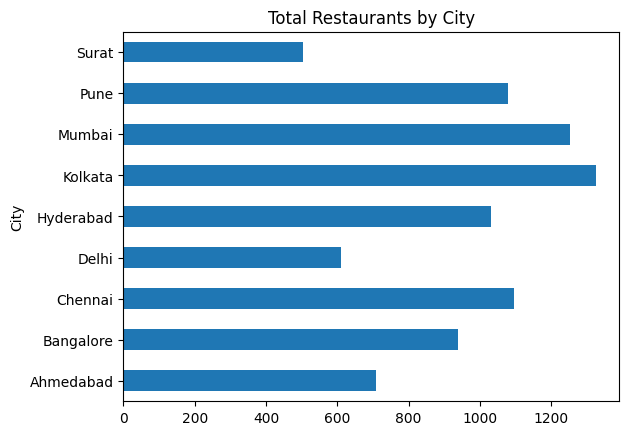

In [ ]:
Total_restaurants_by_city = df[['City','Restaurant']].groupby(['City'])['Restaurant'].nunique()
display(Total_restaurants_by_city.sort_values())
Total_restaurants_by_city.plot(kind='barh', x='city')
plt.title('Total Restaurants by City')


### The distribution of Restaurants across Cities identifies the Market potential in each city and helps in targeting strategies.

# 2. Number of Restaurants by Area and City.

In [ ]:
Total_restaurants_by_city_and_area = df[['City','Restaurant','Area']].groupby(['City','Area'])['Restaurant'].nunique()
display(Total_restaurants_by_city_and_area)


City       Area                
Ahmedabad   Akhbar Nagar Circle     1
           Acher                    1
           Ahmedabad                9
           Ambavadi                 1
           Ambawadi                25
                                   ..
Surat      Vesu                    21
           Vip Road                 1
           Vishal Nagar             6
           Yamuna Nagar             3
           Yoginagar Society        1
Name: Restaurant, Length: 843, dtype: int64

### This distribution allows for more granular analysis which enables Swiggy to better understand local market dynamics, target specific neighborhoods with tailored marketing strategies, and optimize delivery logistics based on geographical proximity.

# 3. Average Order Price by each City.

,Avg_Price,Total_orders
City,,
Mumbai,393.794832,1277
Bangalore,382.524313,946
Kolkata,362.294205,1346
Chennai,356.247740,1106
Pune,353.763303,1090
Delhi,333.301146,611
Ahmedabad,318.128312,717
Hyderabad,299.926512,1075
Surat,270.171875,512


Text(0.5, 1.0, 'Average Price by City')

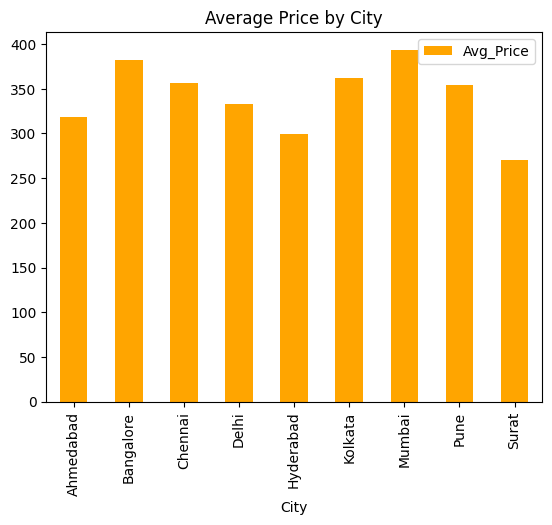

In [ ]:
Avgprice_by_city = df[['City','Price','ID']].groupby(['City']).agg(Avg_Price =('Price','mean'), Total_orders = ('ID', 'nunique'))
display(Avgprice_by_city.sort_values(by='Avg_Price',ascending=False))
Avgprice_by_city.plot(kind='bar',color='orange',y='Avg_Price')
plt.title('Average Price by City')


### This helps in understanding spending pattern and enable Swiggy to identify potential pricing strategies, and curate promotional offers based on regional preferences to enhance customer satisfaction.

# 4. Expensive City based on Average Food Price and Number of Orders placed.

In [ ]:
Expensive_City = df[['City','Price','ID']].groupby(['City']).agg(Avg_Price =('Price','mean'), Total_orders = ('ID', 'nunique'))
Expensive_City['Price_ratio'] = Expensive_City['Avg_Price'] / Expensive_City['Total_orders']

,Avg_Price,Total_orders,Price_ratio
City,,,
Delhi,333.301146,611,0.545501
Surat,270.171875,512,0.527679
Ahmedabad,318.128312,717,0.443694
Bangalore,382.524313,946,0.404360
Pune,353.763303,1090,0.324553
Chennai,356.247740,1106,0.322105
Mumbai,393.794832,1277,0.308375
Hyderabad,299.926512,1075,0.279001
Kolkata,362.294205,1346,0.269164


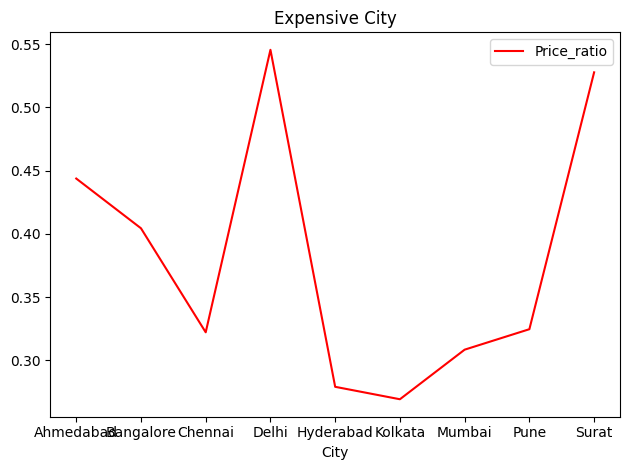

In [ ]:
display(Expensive_City.sort_values(by='Price_ratio',ascending=False))
Expensive_City.plot(kind='line',y='Price_ratio',color='red')
plt.title('Expensive City')
plt.tight_layout()
plt.subplots_adjust()

###  By analyzing these metrics together, Swiggy can pinpoint lucrative markets with a high demand for premium food options and craft its business strategies accordingly and capitalize on revenue opportunities in affluent markets.

# 5. Minimum and Maximum Delivery times based on Food type and associated Restaurants.

In [ ]:
Min_delivery_time = df.groupby(['City','Area','Food type','Restaurant'])['Delivery time'].min()
Min_delivery_time.sort_values().head(10)

City       Area                  Food type                                                              Restaurant             
Hyderabad  Koti                  Ice Cream,Desserts,Beverages                                           Scoops                     20
Delhi      Budh Vihar            Indian,Chinese                                                         Wah Ji Wah ( Budhvihar)    21
Surat      Udhna                 Beverages,Chinese,Punjabi                                              Sarvottam Restaurant       22
Hyderabad  Gowliguda             Haleem,Arabian,Biryani,Tandoor,Chinese,Indian,Desserts,Kebabs,Mughlai  Hotel Niagara              23
           Narayanguda           Ice Cream,Desserts                                                     Nic Natural Ice Creams     23
           Abids                 Ice Cream                                                              Famous Ice Cream           24
           Venkateshwara Colony  Desserts  Ice Cream  Chaat         

In [12]:
Max_delivery_time = df.groupby(['City','Area','Food type','Restaurant'])['Delivery time'].max()
Max_delivery_time.sort_values(ascending= False).head(10)

City     Area           Food type         Restaurant                    
Kolkata  Kestopur       Indian            Heavens Kitchen                   109
         Santoshpur     Chinese,Desserts  Yin Yang - Pan Asian Delicacy     100
         Lake Town      Fast Food         Sandwizz                           98
                        North Indian      Shree Ganesh Home Kitchen          98
         Tollygunge     Chinese           Fatty Mamma Chinese Restaurant     98
         Ruby Area      Indian            Dastaan                            98
         Dumdum         Chinese,Pastas    Tamang'S Frozen Momo               98
                        Chinese,Indian    Hesel Food Court                   97
         Rabindrapally  North Indian      Me & U                             97
         Kidderpore     Chinese,Seafood   Red Chilli Restaurant              97
Name: Delivery time, dtype: int64

### This provides valuable insights into service efficiency and operational performance. This analysis enables Swiggy to identify trends, optimize delivery logistics, and enhance service quality to meet customer expectations across different food types and restaurant partners.

# 6. Ten Most ordered Food types.

<ipython-input-15-1e8f146c70d4>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  Most_ordered_foodtype = df.groupby(['Food type'])['ID'].nunique().max(level = 'Food type')


Text(0.5, 1.0, 'Most Ordered Food Types')

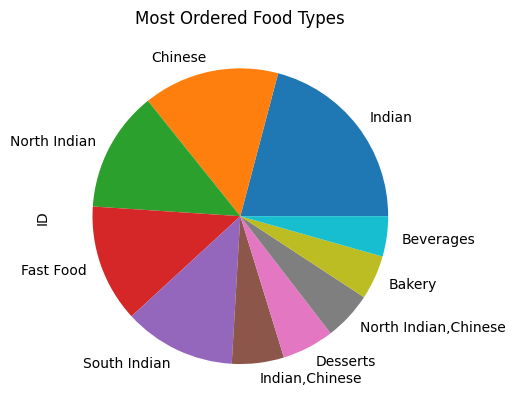

In [15]:
Most_ordered_foodtype = df.groupby(['Food type'])['ID'].nunique().max(level = 'Food type')
Most_ordered_Foodtype =Most_ordered_foodtype.sort_values(ascending=False).head(10)
Most_ordered_Foodtype.plot(kind='pie')
plt.title('Most Ordered Food Types')

### This allows to understand popular Customer food choices and helps Swiggy prioritize menu recommendations, promotional campaigns, and partnerships with restaurants to meet customer demand and drive order volumes.

# 7. Assessing Quality of food by Average ratings provided by Customers in each City.

Text(0.5, 1.0, 'Average Ratings of Food by each City')

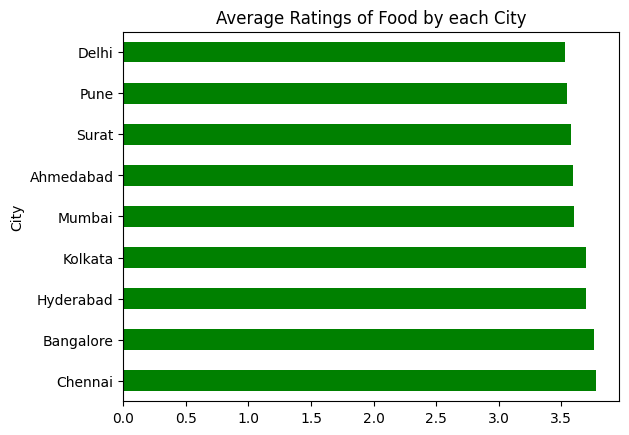

In [18]:
Avg_ratings_by_city = df.groupby(['City'])['Avg ratings'].mean()
Avg_Ratings = Avg_ratings_by_city.sort_values(ascending= False)
Avg_Ratings.plot(kind='barh', color='green')
plt.title('Average Ratings of Food by each City')

### This provides insights into Customer Satisfaction levels and overall service experience so that Swiggy can identify areas of strength, prioritize partnerships with highly-rated restaurants and implement targeted initiatives to enhance food quality and customer satisfaction.

# 8.Top 5 Highly Rated Restaurants in each City.

In [ ]:
Chennai = df[df['City']== 'Chennai']
Chennai_Highly_rated_restaurants = Chennai.groupby('Restaurant')['Avg ratings'].mean()
Chennai_Highly_rated_restaurants.sort_values(ascending=False).head(5)


Restaurant
Afresh             5.00
1By2               4.90
Milkie Mustache    4.90
Ricky'S Cookies    4.90
Nasi And Mee       4.75
Name: Avg ratings, dtype: float64

In [ ]:
Bangalore = df[df['City']== 'Bangalore']
Bangalore_Highly_rated_restaurants = Bangalore.groupby('Restaurant')['Avg ratings'].mean()
Bangalore_Highly_rated_restaurants.sort_values(ascending=False).head(5)


Restaurant
Tricky Shakes             5.0
Creams & Bites            5.0
Frosty Crumble            4.9
Royce' Chocolate          4.9
Keventers Ice Creamery    4.9
Name: Avg ratings, dtype: float64

In [ ]:
Hyderabad = df[df['City']== 'Hyderabad']
Hyderabad_Highly_rated_restaurants = Hyderabad.groupby('Restaurant')['Avg ratings'].mean()
Hyderabad_Highly_rated_restaurants.sort_values(ascending=False).head(5)


Restaurant
Splurge - Thickshakes And Milkshakes    5.0
Wallonia Waffle Co.                     5.0
The Liege Waffles                       5.0
Zorro - Milkshakes And Thickshakes      5.0
Snack House                             4.9
Name: Avg ratings, dtype: float64

In [ ]:
Kolkata = df[df['City']== 'Kolkata']
Kolkata_Highly_rated_restaurants = Kolkata.groupby('Restaurant')['Avg ratings'].mean()
Kolkata_Highly_rated_restaurants.sort_values(ascending=False).head(5)


Restaurant
Keventers Ice Creamery                     5.0
Pabrai'S Fresh And Naturelle Icecream      4.9
Pabrai'S Fresh And Naturelle Ice Creams    4.8
What'S Your Flavour?                       4.8
Natural Ice Cream                          4.8
Name: Avg ratings, dtype: float64

In [ ]:
Mumbai = df[df['City']== 'Mumbai']
Mumbai_Highly_rated_restaurants = Mumbai.groupby('Restaurant')['Avg ratings'].mean()
Mumbai_Highly_rated_restaurants.sort_values(ascending=False).head(5)


Restaurant
Diamond Market Pizza Jp    5.0
Cafe Kokomo                5.0
Get In My Belly            5.0
Nivala Apka Apna           5.0
The Asian Pavilion         5.0
Name: Avg ratings, dtype: float64

In [ ]:
Ahmedabad = df[df['City']== 'Ahmedabad']
Ahmedabad_Highly_rated_restaurants = Ahmedabad.groupby('Restaurant')['Avg ratings'].mean()
Ahmedabad_Highly_rated_restaurants.sort_values(ascending=False).head(5)


Restaurant
Natural Ice Cream                         4.8
Ching Chong Chinese                       4.8
Wok On Fire - Indo Chinese - Pan Asian    4.8
Chup Chaap                                4.8
Puffing - The Live Puff                   4.7
Name: Avg ratings, dtype: float64

In [ ]:
Surat = df[df['City']== 'Surat']
Surat_Highly_rated_restaurants = Surat.groupby('Restaurant')['Avg ratings'].mean()
Surat_Highly_rated_restaurants.sort_values(ascending=False).head(5)


Restaurant
Sobis Diet Farm               4.8
Kudrati Kahumbo               4.8
The Pancake Story             4.8
The Bungalow Cafe             4.7
Amardeep Icecream & Juices    4.7
Name: Avg ratings, dtype: float64

In [ ]:
Pune = df[df['City']== 'Pune']
Pune_Highly_rated_restaurants = Pune.groupby('Restaurant')['Avg ratings'].mean()
Pune_Highly_rated_restaurants.sort_values(ascending=False).head(5)


Restaurant
Shree Krishna Juice Bar    5.0
Papacream                  5.0
Gulp                       4.9
Rosso Bianco               4.8
Arun Ice Creams            4.8
Name: Avg ratings, dtype: float64

In [ ]:
Delhi = df[df['City']== 'Delhi']
Delhi_Highly_rated_restaurants = Delhi.groupby('Restaurant')['Avg ratings'].mean()
Delhi_Highly_rated_restaurants.sort_values(ascending=False).head(5)


Restaurant
Fat Tiger                                5.0
Pizza Paradise By Vhc                    4.8
Biryani By Kilo                          4.8
The Sugar Free Keto Kafe - By Artinci    4.8
Wok On Fire                              4.7
Name: Avg ratings, dtype: float64

### This showcases establishments known for exceptional quality and customer satisfaction allows customers to discover popular dining options, enhances Swiggy's reputation as a trusted platform for restaurant recommendations, and drives customer engagement and loyalty.

# 9. Top Restaurants from which Most Orders placed by each City.

In [ ]:
Pune = df[df['City']== 'Pune']
Pune_Mostly_ordered_restaurants = Pune.groupby('Restaurant')['ID'].count()
Pune_Mostly_ordered_restaurants.sort_values(ascending=False).head(5)


Restaurant
London Dairy                   2
One Way Paratha                2
Crazy Momos                    2
Kareem'S                       2
Getawhey- Healthy Ice Cream    2
Name: ID, dtype: int64

In [ ]:
Chennai = df[df['City']== 'Chennai']
Chennai_Mostly_ordered_restaurants = Chennai.groupby('Restaurant')['ID'].count()
Chennai_Mostly_ordered_restaurants.sort_values(ascending=False).head(5)


Restaurant
The Grand Sweets And Snacks - Amirtham Restaurant    3
Lassi Shop                                           3
Nasi And Mee                                         2
Perambur Sri Srinivasa Sweets And Snacks             2
Alibaba Shawarma And 40 Dishes                       2
Name: ID, dtype: int64

In [ ]:
Mumbai = df[df['City']== 'Mumbai']
Mumbai_Mostly_ordered_restaurants = Mumbai.groupby('Restaurant')['ID'].count()
Mumbai_Mostly_ordered_restaurants.sort_values(ascending=False).head(5)


Restaurant
Merwans Cake Stop              2
Wow! China                     2
Shiv Sagar                     2
Poetry By Love & Cheesecake    2
Newyork Burrito Company        2
Name: ID, dtype: int64

In [ ]:
Kolkata = df[df['City']== 'Kolkata']
Kolkata_Mostly_ordered_restaurants = Kolkata.groupby('Restaurant')['ID'].count()
Kolkata_Mostly_ordered_restaurants.sort_values(ascending=False).head(5)


Restaurant
Kasturi Restaurant       2
Anir'S                   2
Him Cream                2
Fries Before Guys        2
Absabsolute Barbecues    2
Name: ID, dtype: int64

In [ ]:
Ahmedabad = df[df['City']== 'Ahmedabad']
Ahmedabad_Mostly_ordered_restaurants = Ahmedabad.groupby('Restaurant')['ID'].count()
Ahmedabad_Mostly_ordered_restaurants.sort_values(ascending=False).head(5)


Restaurant
The Lio' Pizza    2
Tummy Fillers     2
Cake Corner       2
Cake Adda         2
La Pinoz Pizza    2
Name: ID, dtype: int64

In [ ]:
Surat = df[df['City']== 'Surat']
Surat_Mostly_ordered_restaurants = Surat.groupby('Restaurant')['ID'].count()
Surat_Mostly_ordered_restaurants.sort_values(ascending=False).head(5)


Restaurant
La Pino'Z Pizza        5
Hotel Maruti           2
Kutchi King            2
Bismillah              2
Pandeyji Restaurant    1
Name: ID, dtype: int64

In [ ]:
Delhi = df[df['City']== 'Delhi']
Delhi_Mostly_ordered_restaurants = Delhi.groupby('Restaurant')['ID'].count()
Delhi_Mostly_ordered_restaurants.sort_values(ascending=False).head(5)


Restaurant
 Kishori Lal Paan       1
Pooran'S Ambala Wale    1
Pizza Hut               1
Pizza King              1
Pizza Pan               1
Name: ID, dtype: int64

In [ ]:
Hyderabad = df[df['City']== 'Hyderabad']
Hyderabad_Mostly_ordered_restaurants = Hyderabad.groupby('Restaurant')['ID'].count()
Hyderabad_Mostly_ordered_restaurants.sort_values(ascending=False).head(5)


Restaurant
Haldirams                       3
Kritunga Restaurant             3
Pizza Hut                       2
Rambharose - Bhattad Ki Idli    2
Dairy Den                       2
Name: ID, dtype: int64

In [ ]:
Bangalore = df[df['City']== 'Bangalore']
Bangalore_Mostly_ordered_restaurants = Bangalore.groupby('Restaurant')['ID'].count()
Bangalore_Mostly_ordered_restaurants.sort_values(ascending=False).head(5)


Restaurant
Goli Vada Pav No .1               2
Raffaele'S Ristorante Pizzeria    2
Punjabi Bowl                      2
Voosh Thalis & Bowls              2
Hari Super Sandwich               2
Name: ID, dtype: int64

### This helps in identify customer preferences and popular food destinations allowing Swiggy to highlight high-demand restaurants, optimize delivery logistics, and strengthen partnerships to ensure timely and efficient service delivery, curate special offers thereby enhancing customer satisfaction.